In [43]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt
import os
import shutil

In [44]:
class regression(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Sequential(
            nn.Linear(1, 5),
            nn.Sigmoid(),
            nn.Linear(5, 10),
            nn.Sigmoid(),
            nn.Linear(10, 5),
            nn.Sigmoid(),
            nn.Linear(5, 1)
        )
        self.reset_parameters()

    def forward(self,x):
        x = self.linear(x)
        return x
    def reset_parameters(self):
        for layer in self.linear:
            if isinstance(layer, nn.Linear):
                nn.init.xavier_normal_(layer.weight)
                nn.init.zeros_(layer.bias)

In [45]:
class dataset(Dataset):
    def __init__(self, data : list):
        self.data = data
    def __len__(self):
        return len(self.data)
    def __getitem__(self, idx):
        x = torch.tensor(self.data[idx][0],dtype=torch.float32).reshape(-1,1)
        y = torch.tensor(self.data[idx][1],dtype=torch.float32).reshape(-1,1)
        return x, y

In [46]:
def normalize(data: np.array):
    return (data - data.mean()) / data.std()

def plot(model,epoch):
    plt.cla()
    # plot the mormalized data
    plt.scatter(data[:,0], data[:,1],c='r')
    # plot the predicted data
    # get the max input and min input
    max_input = data.max()
    min_input = data.min()
    # get the predicted data
    x = torch.linspace(min_input, max_input, 100).reshape(-1,1)
    y = model(x)
    # plot the predicted data
    plt.plot(x.detach().numpy(), y.detach().numpy())
    plt.savefig(os.path.join('images',f'results{epoch}.png'))

In [47]:
def train():
    for epoch in range(10000):
        for x,y in point_loader:
            optimizer.zero_grad()
            output = model(x)
            loss = criterion(output, y)
            loss.backward()
            optimizer.step()
            if epoch % 100 == 0:
                print(f'epoch: {epoch} loss: {loss.item()}')
                plot(model,epoch)

In [48]:
import imageio
import os
import natsort
def make_gif(path = 'images'):
    image_files = natsort.natsorted(os.listdir(path))
    images = [imageio.imread(os.path.join(path, f)) for f in image_files]
    imageio.mimsave('training.gif', images, fps=20)

epoch: 0 loss: 0.46567511558532715
epoch: 0 loss: 0.07600515335798264
epoch: 0 loss: 0.016432343050837517
epoch: 0 loss: 0.11784677952528
epoch: 0 loss: 1.498435139656067
epoch: 100 loss: 0.09339433908462524
epoch: 100 loss: 0.2476906180381775
epoch: 100 loss: 0.023238111287355423
epoch: 100 loss: 0.034042567014694214
epoch: 100 loss: 0.03266013786196709
epoch: 200 loss: 0.1172308698296547
epoch: 200 loss: 0.23409277200698853
epoch: 200 loss: 0.010630224831402302
epoch: 200 loss: 0.0057625435292720795
epoch: 200 loss: 0.002102870959788561
epoch: 300 loss: 0.12119784951210022
epoch: 300 loss: 0.22642368078231812
epoch: 300 loss: 0.010722334496676922
epoch: 300 loss: 0.002055675256997347
epoch: 300 loss: 0.0005194825935177505
epoch: 400 loss: 0.11498323082923889
epoch: 400 loss: 0.22406354546546936
epoch: 400 loss: 0.01286217849701643
epoch: 400 loss: 0.0015999384922906756
epoch: 400 loss: 0.0003328032325953245
epoch: 500 loss: 0.10653072595596313
epoch: 500 loss: 0.22172872722148895
epo

/tmp/ipykernel_2462/3808246298.py:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images = [imageio.imread(os.path.join(path, f)) for f in image_files]


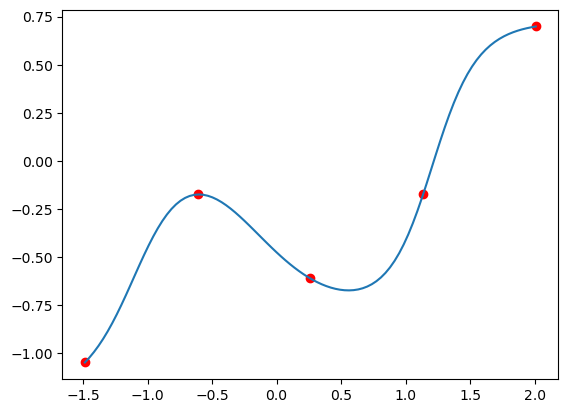

In [49]:
path = 'images'
if os.path.exists(path):
    shutil.rmtree(path)
os.makedirs(path)
data = [[1, 2], [3, 4], [5, 3], [7, 4], [9, 6]]
data = np.array(data)
data = normalize(data)
points = dataset(data)
point_loader = DataLoader(points, batch_size=1, shuffle=False)
model = regression()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-2)
train()
make_gif()
